In [1]:
import pygsti
import time
import pickle
import numpy as np
from pygsti.construction import std1Q_XYI
gs_target = std1Q_XYI.gs_target
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Load in bootstrapped gatesets.  Can either generate using "Bootstrap Dataset Creation.ipynb" or load pre-computed 
#gatesets.
bootstrapped_gs_list = []
for i in xrange(100):
    gs = pygsti.io.load_gateset('../ComputedObjects/GST_Bootstrap-8192_10-20-16/gateset_parametric_logl_'+str(i)+'.gateset')
    gs.set_all_parameterizations('TP')
    bootstrapped_gs_list.append(gs)

In [3]:
GSTResults = pickle.load(open('../ComputedObjects/2015_03_30-GST_BB1_XYXY_8192_condensed.pkl','r'))
gsGST = GSTResults.gatesets['final estimate']

In [4]:
#Set confidence level for analytic error bars
GSTResults.confidence_level = 95

In [5]:
#Analytically compute error bars.  This may take some time (~1000 s)
start = time.time()
results_table = GSTResults.tables[u'bestGatesetGatesTable']
end = time.time()

    
--- Hessian Projector Optimization for gate CIs (L-BFGS-B) ---
 1099s           0.0015961234
 1108s           0.0007618351
 1116s           0.0005474034
 1133s           0.0004430106
 1150s           0.0003930114
 1159s           0.0003740509
 1167s           0.0002880956
 1176s           0.0002047055
 1193s           0.0001845021
 1202s           0.0001533639
 1211s           0.0001481242
 1219s           0.0001464587
 1227s           0.0001444728
 1236s           0.0001423815
 1245s           0.0001397967
 1253s           0.0001381713
 1262s           0.0001374071
  The resulting min sqrt(sum(gateCIs**2)): 0.000137407


In [6]:
print end - start

1255.18613195


In [7]:
#Gauge-optimize all the bootstrapped gatesets:
bootstrapped_gs_list_1 = [pygsti.optimize_gauge(gs,'target',targetGateset=gs_target,spamWeight=1e-4,constrainToTP=True) for gs in bootstrapped_gs_list]
#Compute 2-sigma bootstrapped error bars:
bootstrapped_error_bars_1 = 2*pygsti.bootstrap.gs_stdev1(lambda x:x.to_vector(),bootstrapped_gs_list_1)

/home/kmrudin/pyGSTi/packages/pygsti/algorithms/gaugeopt.py:278: UserWarning: The function 'optimize_gauge' is deprecated, and may be removed in future versions of pyGSTi
  " and may be removed in future versions of pyGSTi")


In [8]:
#Compute 2-sigma bootstrapped error bars:
bootstrapped_error_bars = 2*pygsti.bootstrap.gs_stdev1(lambda x:x.to_vector(),bootstrapped_gs_list)

In [9]:
x = GSTResults._get_confidence_region(95)
y = x.get_profile_likelihood_confidence_intervals()

In [10]:
bootstrapped_gate_element_error_bars = bootstrapped_error_bars_1[7:]
hessian_gate_element_error_bars = y[7:]

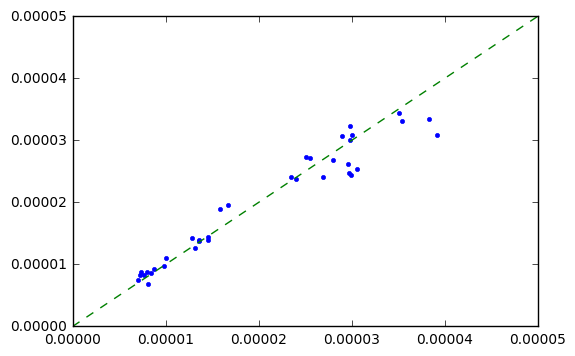

In [11]:
plt.plot(hessian_gate_element_error_bars,bootstrapped_gate_element_error_bars,'.')
plt.plot(np.arange(0,5e-5,1e-6),np.arange(0,5e-5,1e-6),'--')
plt.savefig('../Figures/Fig8.pdf')

In [12]:
print "Analytic\t\tBootstrapped"
for i in zip(hessian_gate_element_error_bars,bootstrapped_gate_element_error_bars):
    print i[0], '\t', i[1]

Analytic		Bootstrapped
7.71770386688e-06 	8.22524253672e-06
1.28800878394e-05 	1.42730075968e-05
2.55242171888e-05 	2.71271729964e-05
2.39811124713e-05 	2.37133736013e-05
8.7093021846e-06 	9.32352711464e-06
2.50567735559e-05 	2.73709879094e-05
1.58605410473e-05 	1.89380584328e-05
2.6923217163e-05 	2.40553636933e-05
9.88611885724e-06 	9.77552169156e-06
2.3537330936e-05 	2.40594358291e-05
2.79631690576e-05 	2.68237586376e-05
1.67099375824e-05 	1.96230683853e-05
8.14897981139e-06 	6.76671534656e-06
1.31696404676e-05 	1.26330583256e-05
2.98081801298e-05 	3.23688485039e-05
3.05398114553e-05 	2.53394910929e-05
7.35689835451e-06 	8.72038488603e-06
2.97516745271e-05 	2.48181498873e-05
3.83243600545e-05 	3.34613385875e-05
1.45390417211e-05 	1.4441299932e-05
7.98733081628e-06 	8.86061588003e-06
3.00351223657e-05 	3.08154541063e-05
1.45949632809e-05 	1.39905652882e-05
3.91821289784e-05 	3.09507777164e-05
8.46043558821e-06 	8.61521051225e-06
3.54199738043e-05 	3.30563081985e-05
2.96682828974e-05 	